In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling

In [2]:
pollution= pd.read_csv('C:/Users/luis-serrano-l/AppData/Local/Temp/Temp1_LSTM-Multivariate_pollution.csv.zip/LSTM-Multivariate_pollution.csv')
pollution.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [3]:
#Relacionar pollution press y wnd_spd
#Convertir date a datetime
pollution['date']

0        2010-01-02 00:00:00
1        2010-01-02 01:00:00
2        2010-01-02 02:00:00
3        2010-01-02 03:00:00
4        2010-01-02 04:00:00
                ...         
43795    2014-12-31 19:00:00
43796    2014-12-31 20:00:00
43797    2014-12-31 21:00:00
43798    2014-12-31 22:00:00
43799    2014-12-31 23:00:00
Name: date, Length: 43800, dtype: object

In [4]:
pollution['date_parsed'] = pd.to_datetime(pollution['date'], infer_datetime_format=True)
pollution['date_parsed']

0       2010-01-02 00:00:00
1       2010-01-02 01:00:00
2       2010-01-02 02:00:00
3       2010-01-02 03:00:00
4       2010-01-02 04:00:00
                ...        
43795   2014-12-31 19:00:00
43796   2014-12-31 20:00:00
43797   2014-12-31 21:00:00
43798   2014-12-31 22:00:00
43799   2014-12-31 23:00:00
Name: date_parsed, Length: 43800, dtype: datetime64[ns]

<AxesSubplot:>

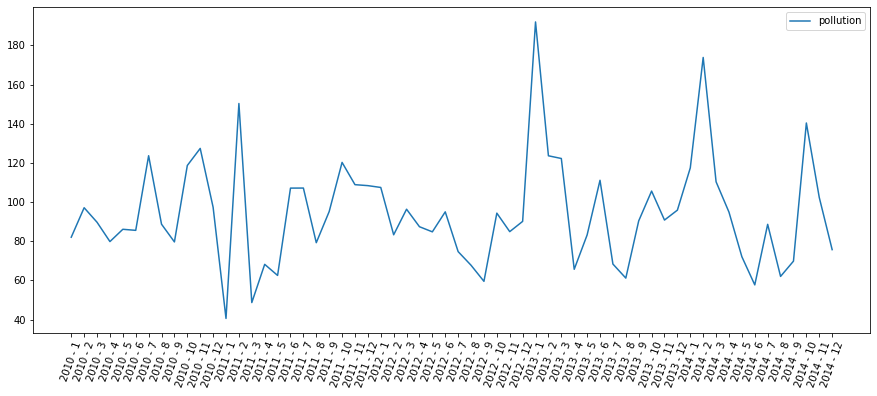

In [5]:
pol_evol=pd.DataFrame(pollution.groupby([pollution['date_parsed'].dt.year, pollution['date_parsed'].dt.month])['pollution'].mean())
pol_evol.index= pol_evol.index.map('{0[0]} - {0[1]}'.format)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=70)
sns.lineplot(data=pol_evol)



Text(0.5, 0, 'year')

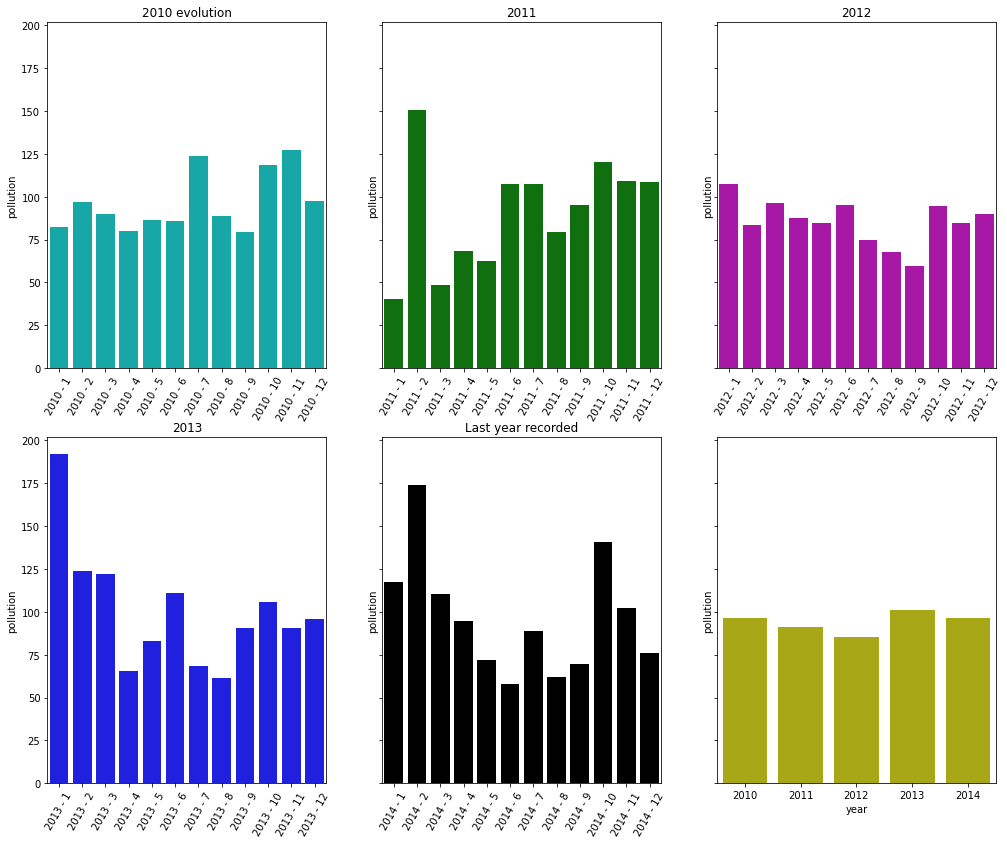

In [6]:
all_years= pd.DataFrame(pollution.groupby(pollution.date_parsed.dt.year).pollution.mean())
first= pol_evol.iloc[0:12]
second= pol_evol.iloc[12:24]
third= pol_evol.iloc[24:36]
fourth= pol_evol.iloc[36:48]
fifth=pol_evol.iloc[48:60]
fig, axes=plt.subplots(2, 3, figsize= (17, 14), sharey=True)
sns.barplot(ax=axes[0, 0], x=first.index, y=first.pollution, color='c')
axes[0, 0].set_xticklabels(first.index, rotation=60)
axes[0, 0].set_title('2010 evolution')
sns.barplot(ax=axes[0, 1], x=second.index, y=second.pollution, color='g')
axes[0, 1].set_xticklabels(second.index, rotation=60)
axes[0, 1].set_title('2011')
sns.barplot(ax=axes[0, 2], x=third.index, y=third.pollution, color='m')
axes[0, 2].set_xticklabels(third.index, rotation=60)
axes[0, 2].set_title('2012')
sns.barplot(ax=axes[1, 0], x=fourth.index, y=fourth.pollution, color='b')
axes[1, 0].set_xticklabels(fourth.index, rotation=60)
axes[1, 0].set_title('2013')
sns.barplot(ax=axes[1, 1], x=fifth.index, y=fifth.pollution, color='k')
axes[1, 1].set_xticklabels(fifth.index, rotation=60)
axes[1, 1].set_title('Last year recorded')
sns.barplot(ax=axes[1, 2], x=all_years.index, y=all_years.pollution, color='y')
axes[1, 2].set_xlabel('year')

<AxesSubplot:ylabel='pollution'>

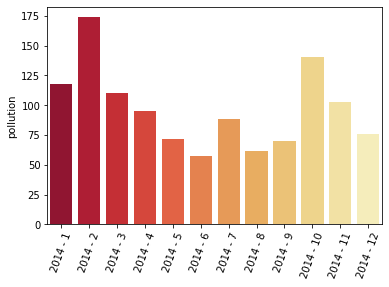

In [12]:
plt.xticks(rotation=70)
sns.barplot(x=fifth.index, y=fifth.pollution, palette = "YlOrRd_r")

<AxesSubplot:>

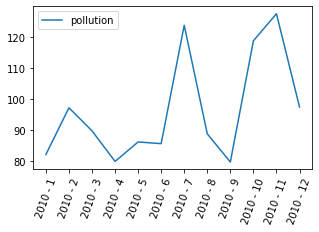

In [8]:
first= pol_evol.iloc[0:12]
plt.figure(figsize=(5, 3))
plt.xticks(rotation=70)
sns.lineplot(data=first)


In [9]:
p_10= pollution.loc[pollution['date_parsed'].dt.year==2010].pollution
p_11= pollution.loc[pollution['date_parsed'].dt.year==2011].pollution
p_12= pollution.loc[pollution['date_parsed'].dt.year==2012].pollution
p_13= pollution.loc[pollution['date_parsed'].dt.year==2013].pollution
p_14= pollution.loc[pollution['date_parsed'].dt.year==2014].pollution
print('Pollution in 2010 -- max: {},     min: {}     mean: {}'.format(p_10.max(), p_10.min(), p_10.mean().round(2)))
print('Pollution in 2011 -- max: {},     min: {}     mean: {}'.format(p_11.max(), p_11.min(), p_11.mean().round(2)))
print('Pollution in 2012 -- max: {},     min: {}     mean: {}'.format(p_12.max(), p_12.min(), p_12.mean().round(2)))
print('Pollution in 2013 -- max: {},     min: {}     mean: {}'.format(p_13.max(), p_13.min(), p_13.mean().round(2)))
print('Pollution in 2014 -- max: {},     min: {}     mean: {}'.format(p_14.max(), p_14.min(), p_14.mean().round(2)))


Pollution in 2010 -- max: 980.0,     min: 0.0     mean: 96.36
Pollution in 2011 -- max: 595.0,     min: 0.0     mean: 90.84
Pollution in 2012 -- max: 994.0,     min: 0.0     mean: 85.51
Pollution in 2013 -- max: 886.0,     min: 0.0     mean: 100.76
Pollution in 2014 -- max: 671.0,     min: 0.0     mean: 96.63


In [10]:
pollution.drop(columns=['date'], inplace=True)

In [ ]:
#Sacar los niveles que tengan la dirección del viento igual a la del día anterior
pollution.loc[pollution.wnd_dir==pollution.wnd_dir]

In [ ]:
pollution['pres']=minmax_scaling(pollution['press'], columns=[0]).round(3)
pollution['wnd_sp']=minmax_scaling(pollution['wnd_spd'], columns=[0]).round(3)
pollution['tem']=minmax_scaling((pollution['temp']), columns=[0]).round(3)
pollution.head()

In [ ]:
scaled_p=pollution.groupby('pollution')['pres', 'wnd_sp', 'tem'].mean()
plt.figure(figsize=(9, 6))
plt.xlim(0, 25)
sns.lineplot(data=scaled_p)

In [ ]:
pollution['press_m']= pollution['press'] - pollution['press'].mean()
pollution['temp_m']= pollution['temp'] - pollution['temp'].mean()
pollution['wnd_spd_m']= (pollution['wnd_spd'] - pollution['wnd_spd'].mean())/10

In [ ]:
p_data= pollution.groupby('pollution')['press_m', 'temp_m', 'wnd_spd_m'].mean().round(1)

Text(0.5, 1.0, 'Range that varies')

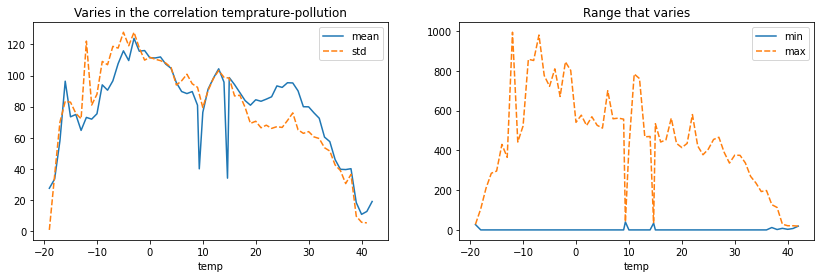

In [ ]:
temp_data= pollution.groupby('temp')['pollution'].describe()
fig, axes=plt.subplots(1, 2, figsize= (14, 4))
sns.lineplot(ax=axes[0], data=temp_data[['mean', 'std']])
axes[0].set_title('Varies in the correlation temprature-pollution')
sns.lineplot(ax=axes[1], data=temp_data[['min', 'max']])
axes[1].set_title('Range that varies')


In [ ]:
pollution['pollution'].describe()

count    43800.000000
mean        94.013516
std         92.252276
min          0.000000
25%         24.000000
50%         68.000000
75%        132.250000
max        994.000000
Name: pollution, dtype: float64

In [ ]:
described_pollution=[]
for i in range(len(pollution['pollution'].describe())):
    described_pollution.append(pollution['pollution'].describe()[i])
described_pollution
described_pollution[3:]

[0.0, 24.0, 68.0, 132.25, 994.0]

Text(0.5, 1.0, 'Range that varies')

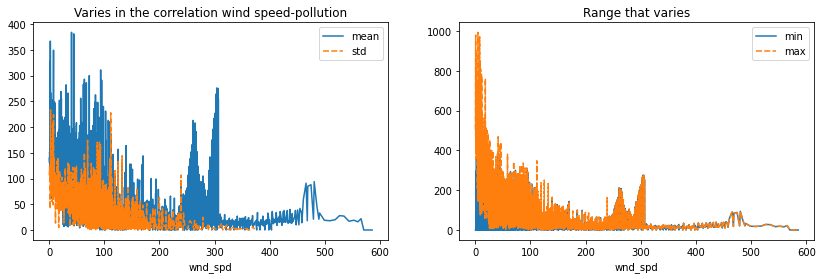

In [ ]:
wind_data= pollution.groupby('wnd_spd')['pollution'].describe()
fig, axes=plt.subplots(1, 2, figsize= (14, 4))
sns.lineplot(ax=axes[0], data=wind_data[['mean', 'std']])
axes[0].set_title('Varies in the correlation wind speed-pollution')
sns.lineplot(ax=axes[1], data=wind_data[['min', 'max']])
axes[1].set_title('Range that varies')


Text(0.5, 1.0, 'Range that varies')

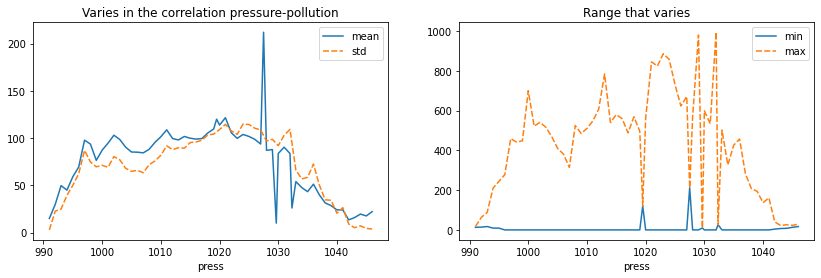

In [ ]:
pressure_data= pollution.groupby('press')['pollution'].describe()
fig, axes=plt.subplots(1, 2, figsize= (14, 4))
sns.lineplot(ax=axes[0], data=pressure_data[['mean', 'std']])
axes[0].set_title('Varies in the correlation pressure-pollution')
sns.lineplot(ax=axes[1], data=pressure_data[['min', 'max']])
axes[1].set_title('Range that varies')
